# Kernel Density Inference: Example

## Load Module

In [1]:
include("src/main.jl")
using .KernelTests

## Kernel Density

### Univariate

In [2]:
x = randn(1000) .* 5 .+ 3 # Normal random sample N = 1000, μ = 3, σ = 5
kd = KernelDensity(x) # Kernel Density
kd |> display

    KernelDensity:
        n = 1000
        Bandwidth (h) = 1.3196004252724247
        domain = (-22.804777916778914, 31.972903880045113)



You can spacify the bandwith, other wise the optimum one will be used.

In [3]:
KernelDensity(x, h = 1.1) |> display

    KernelDensity:
        n = 1000
        Bandwidth (h) = 1.1
        domain = (-22.804777916778914, 31.972903880045113)



In [4]:
# Evaluate at one point
KernelTests.density(0,kd)

0.06566020195770363

In [5]:
# Evaluate at several points
KernelTests.density([-10,0,10],kd)

3-element Vector{Float64}:
 0.0028059246932455807
 0.06566020195770363
 0.03056308109970754

#### Plot

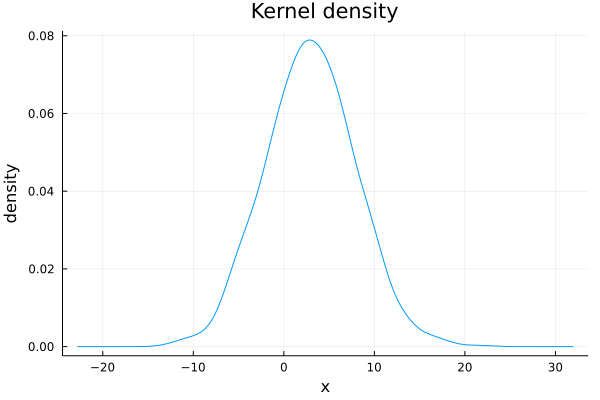

In [6]:
plot(kd,
    title="Kernel density",
    legend = false,
    xlabel = "x",
    ylabel = "density"
)

Another way to plot it is to discretize it and then use the plot function from Plots package

In [7]:
using Plots
my_x,my_y = discretize(kd)
# my_x,my_y = discretize(kd,nGrid = 1000)
[my_x my_y]

401×2 Matrix{Float64}:
 -22.8048  2.11907e-17
 -22.6678  4.72748e-17
 -22.5309  1.04338e-16
 -22.3939  2.27813e-16
 -22.257   4.92087e-16
 -22.1201  1.05156e-15
 -21.9831  2.22306e-15
 -21.8462  4.64942e-15
 -21.7092  9.61998e-15
 -21.5723  1.96915e-14
 -21.4353  3.98762e-14
 -21.2984  7.98877e-14
 -21.1614  1.58335e-13
   ⋮       
  30.4665  7.97158e-14
  30.6035  3.97983e-14
  30.7404  1.96566e-14
  30.8774  9.60446e-15
  31.0143  4.6426e-15
  31.1512  2.2201e-15
  31.2882  1.05028e-15
  31.4251  4.91545e-16
  31.5621  2.27585e-16
  31.699   1.04243e-16
  31.836   4.72357e-17
  31.9729  2.11748e-17

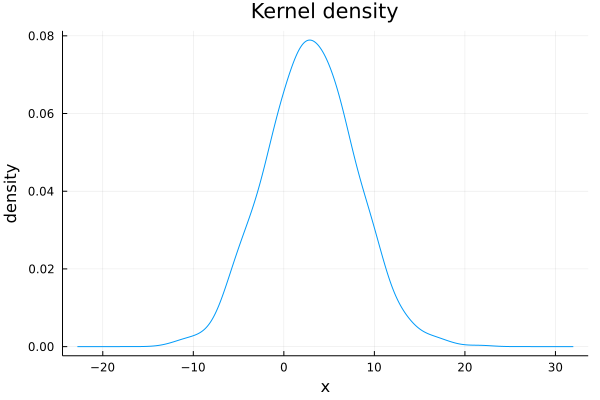

In [8]:
plot(my_x,my_y,
    title="Kernel density",
    legend = false,
    xlabel = "x",
    ylabel = "density"
)

### Bivariate

In [9]:
x = rand(100) # 100 samples from uniform(0,1) distribution
y = -(x .- 1).*(x .+ 1) .+ 0.1 .*randn(100)
bkd = BivariateKernelDensity(x,y)
# you can also specify x and y bandwidths with argumentes hx and hy.
bkd |> display

    KernelDensity:
        n = 100
        Bandwidths (hx,hy) = (0.12526769848607014, 0.1400254508296314)
        domainx = (-0.2983285461070769, 1.2940439551018128)
        domainy = (-0.4437317141641693, 1.5686070505864542)



In [10]:
# evaluate it at one point
KernelTests.density((0,0),bkd)

6.453062924176445e-8

In [11]:
# evaluate it at several points
KernelTests.density([(0,0),(-0.2,1.0)],bkd)

2-element Vector{Float64}:
 6.453062924176445e-8
 0.09828016165838052

#### Plot

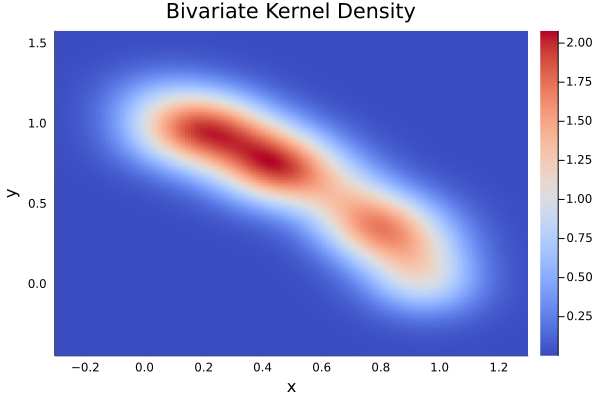

In [12]:
plot(bkd,
    title = "Bivariate Kernel Density",
    xlabel = "x",
    ylabel = "y"
)

You can discretize bivariate kernels too:

In [13]:
my_pts,my_dty = discretize(bkd)
# my_pts,my_dty = discretize(bkd, nGrid = 100)
[my_pts my_dty]

160000×2 Matrix{Any}:
 (-0.298329, -0.443732)  5.84408e-21
 (-0.298329, -0.438688)  7.78644e-21
 (-0.298329, -0.433645)  1.03686e-20
 (-0.298329, -0.428601)  1.37988e-20
 (-0.298329, -0.423558)  1.83526e-20
 (-0.298329, -0.418514)  2.43936e-20
 (-0.298329, -0.413471)  3.24015e-20
 (-0.298329, -0.408428)  4.30088e-20
 (-0.298329, -0.403384)  5.70487e-20
 (-0.298329, -0.398341)  7.56174e-20
 (-0.298329, -0.393297)  1.00156e-19
 (-0.298329, -0.388254)  1.3256e-19
 (-0.298329, -0.38321)   1.75313e-19
 ⋮                       
 (1.29404, 1.51313)      1.88747e-14
 (1.29404, 1.51817)      1.5466e-14
 (1.29404, 1.52322)      1.26603e-14
 (1.29404, 1.52826)      1.03534e-14
 (1.29404, 1.5333)       8.45844e-15
 (1.29404, 1.53835)      6.90348e-15
 (1.29404, 1.54339)      5.62879e-15
 (1.29404, 1.54843)      4.58494e-15
 (1.29404, 1.55348)      3.73097e-15
 (1.29404, 1.55852)      3.03305e-15
 (1.29404, 1.56356)      2.46325e-15
 (1.29404, 1.56861)      1.99852e-15

## Hypothesys Tests

### Distributions equality test

In [14]:
# Generate samples
x = randn(100) .* 1.5 .+ 3
y = randn(80) .+ 3
length(x),length(y)

(100, 80)

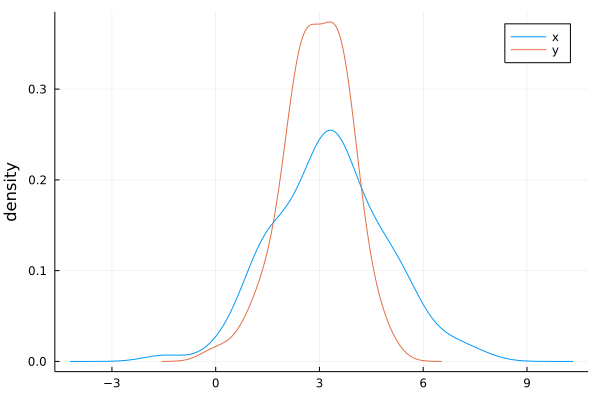

In [15]:
# plot their kernel density estimations
plot(KernelDensity(x),
    label = "x",
    ylabel = "density"
)
plot!(KernelDensity(y),
    label = "y"
)

In [16]:
# perform test
my_test = sameDistributionTest(x,y)
# my_test = sameDistributionTest(x,y, NIter = 1000)
my_test |> display

Equal distributions test:
    Samples length: 
        n1 = 100
        n2 = 80
    Null Hypothesys:
        Both samples have the same probability density function.
    Test Statistic:
        Tc = 0.044415554696254314
        p-value = 0.0
            (aproximated using 500 iterations).



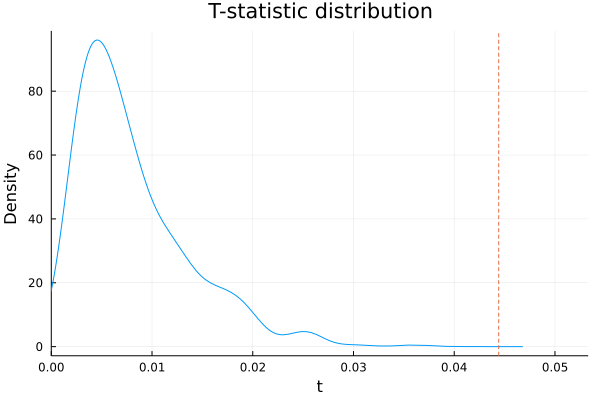

In [17]:
# plot statistic distribution and the realization (red dotted line)
plot(my_test)

Another example:

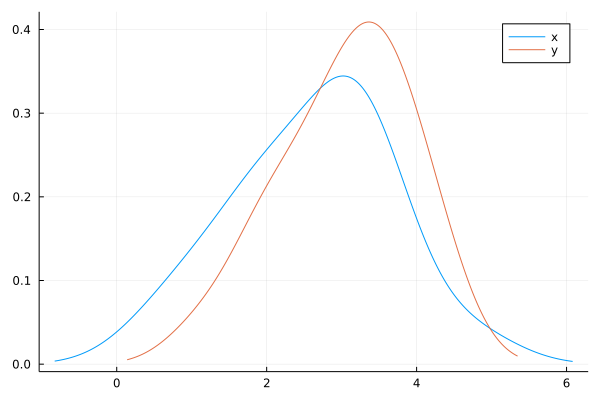

In [18]:
x = randn(20) .+ 2.7 
y = randn(20) .+ 3 

plot(discretize(KernelDensity(x))...,legend = :topright,label = "x")
plot!(discretize(KernelDensity(y))...,label = "y")

In [19]:
my_test = sameDistributionTest(x,y)
my_test |> display

Equal distributions test:
    Samples length: 
        n1 = 20
        n2 = 20
    Null Hypothesys:
        Both samples have the same probability density function.
    Test Statistic:
        Tc = 0.02666591759191063
        p-value = 0.456
            (aproximated using 500 iterations).



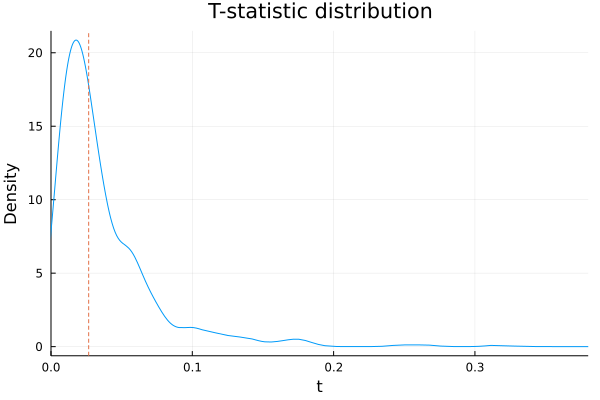

In [20]:
plot(my_test)

Now we increase the sample size

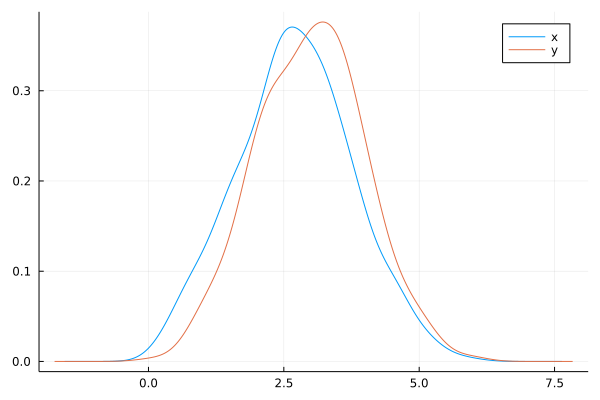

In [21]:
x = randn(500) .+ 2.7 
y = randn(500) .+ 3 

plot(discretize(KernelDensity(x))...,legend = :topright,label = "x")
plot!(discretize(KernelDensity(y))...,label = "y")

In [22]:
my_test = sameDistributionTest(x,y)
my_test |> display

Equal distributions test:
    Samples length: 
        n1 = 500
        n2 = 500
    Null Hypothesys:
        Both samples have the same probability density function.
    Test Statistic:
        Tc = 0.011790236111444684
        p-value = 0.0
            (aproximated using 500 iterations).



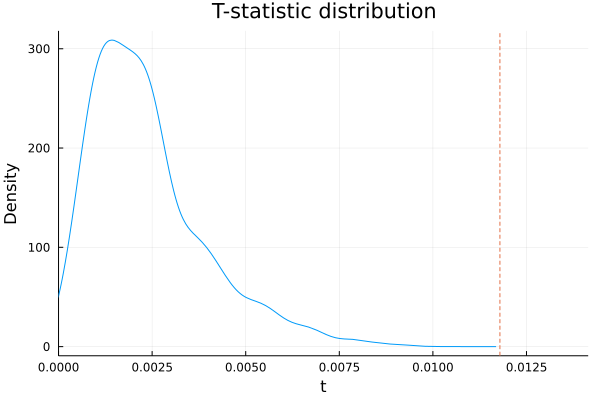

In [23]:
plot(my_test)

### Independet populations test

Independent samples:

In [24]:
x = randn(30)
y = exp.(2 .+ rand(30))

# perform test
my_test = independencyTest(x,y)
my_test |> display

Independency test:
    Sample length: 
        n = 30
    Null Hypothesys:
        Variables x and y are independent.
    Test Statistic:
        Tc = 0.1387902994190565
        p-value = 0.348
            (aproximated using 500 iterations).



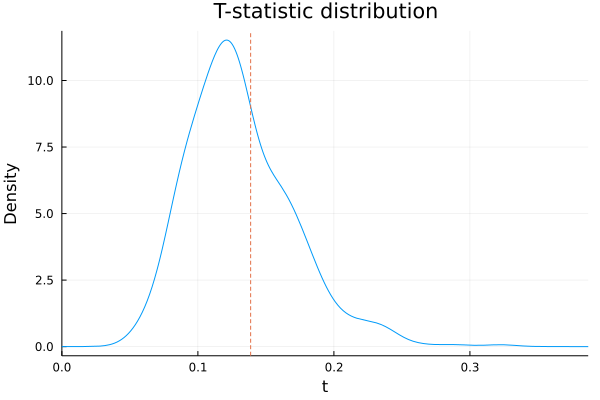

In [25]:
plot(my_test)

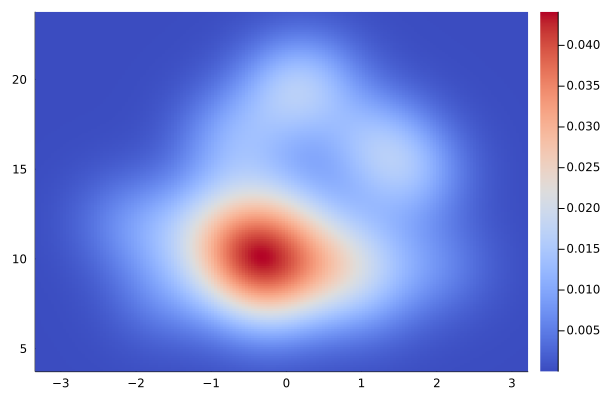

In [26]:
# their bivariate kernel density
BivariateKernelDensity(x,y) |> plot

Dependent samples:

In [27]:
x = randn(30)
y = exp.(2 .+ rand(30)) .+  4x

my_test = independencyTest(x,y)
my_test |> display

Independency test:
    Sample length: 
        n = 30
    Null Hypothesys:
        Variables x and y are independent.
    Test Statistic:
        Tc = 0.4037591691854353
        p-value = 0.0
            (aproximated using 500 iterations).



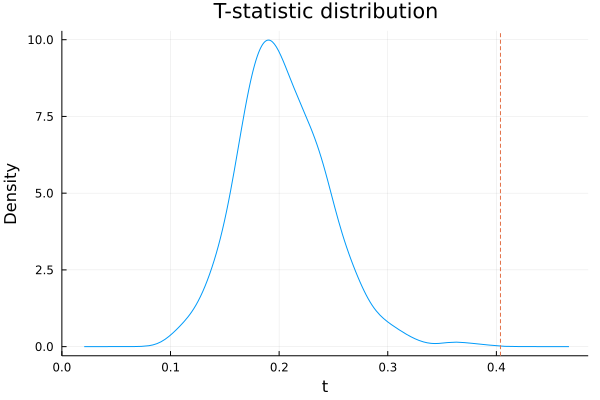

In [28]:
plot(my_test)

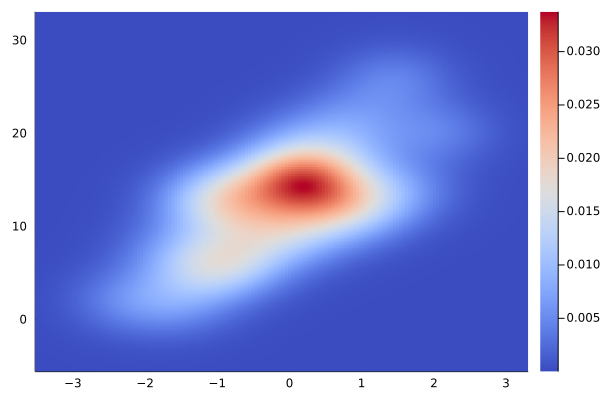

In [29]:
# their bivariate kernel density
BivariateKernelDensity(x,y) |> plot